# Level 4 Python
--------------|-------|
|Danylo Zdoryk| 233305|
|Dmytro Shelest| 226453|
|Gracjan Grala| 210192|
|Jan Kisielewicz| 210221|



---
## Importing libraries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as tcr
import seaborn as sns


---
## Reading data and creating data frame using pandas

In [3]:
df = pd.read_csv("D:\Projects\data-processing-with-python\\athlete_events.csv")
# Showing columns info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


---
# Exercises
---


---
## Exercise 1. Prepare a summary of the total number of competitors at the Summer and Winter Olympics in the following years.
---

In [4]:
participants_1 = df[['Year', 'Season' , 'ID']].groupby(['Year', 'Season']).count().reset_index().rename(columns={"ID":"Amount"})
participants_1

,Year,Season,Amount
0,1896,Summer,380
1,1900,Summer,1936
2,1904,Summer,1301
3,1906,Summer,1733
4,1908,Summer,3101
5,1912,Summer,4040
6,1920,Summer,4292
7,1924,Summer,5233
8,1924,Winter,460
9,1928,Summer,4992


---
## Visualization 1.1
---

C:\Users\nicez\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


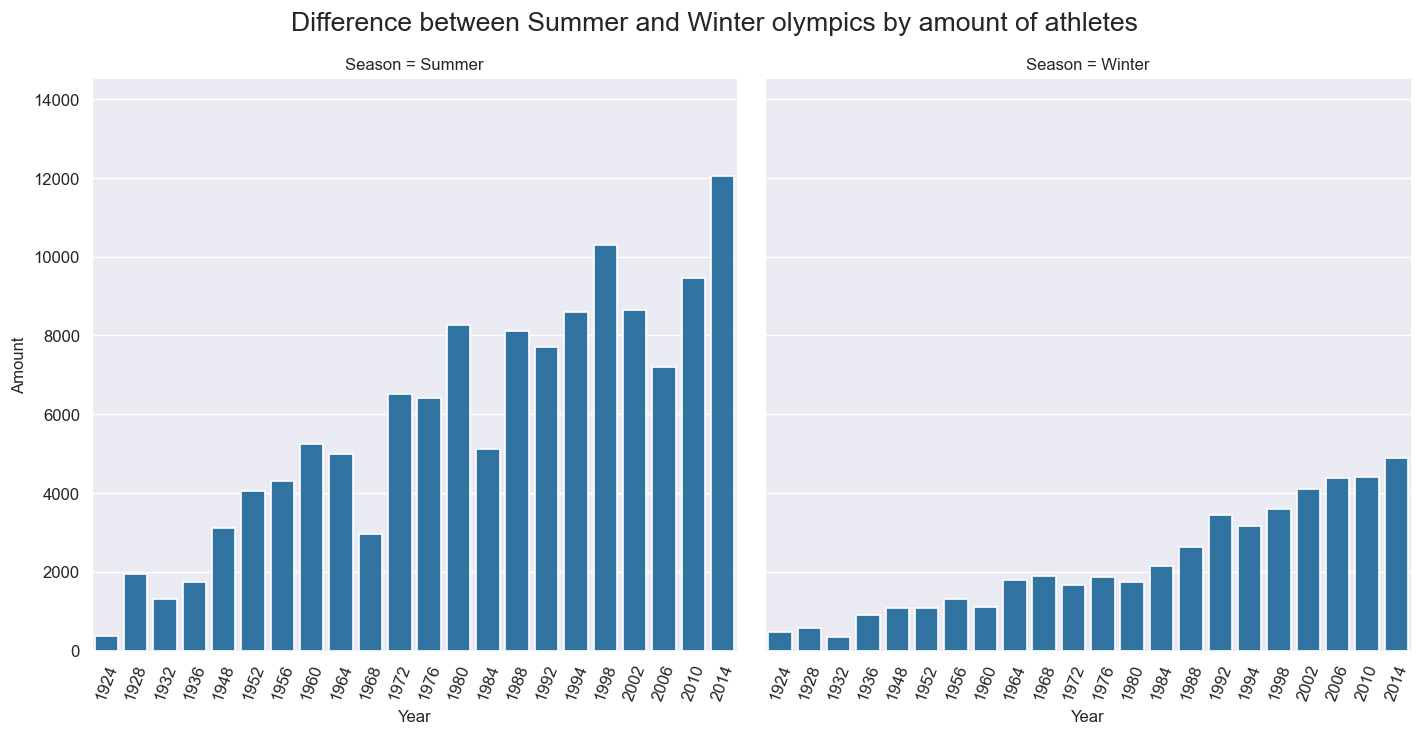

In [5]:
g = sns.FacetGrid(participants_1, col="Season")
g.fig.set_dpi(120)
g.fig.suptitle('Difference between Summer and Winter olympics by amount of athletes', fontsize=16)
g.fig.set_size_inches(12,6)
g.map(sns.barplot, "Year", "Amount")
g.set_xticklabels(rotation=70)
plt.show()

---
## Visualization 1.2
---

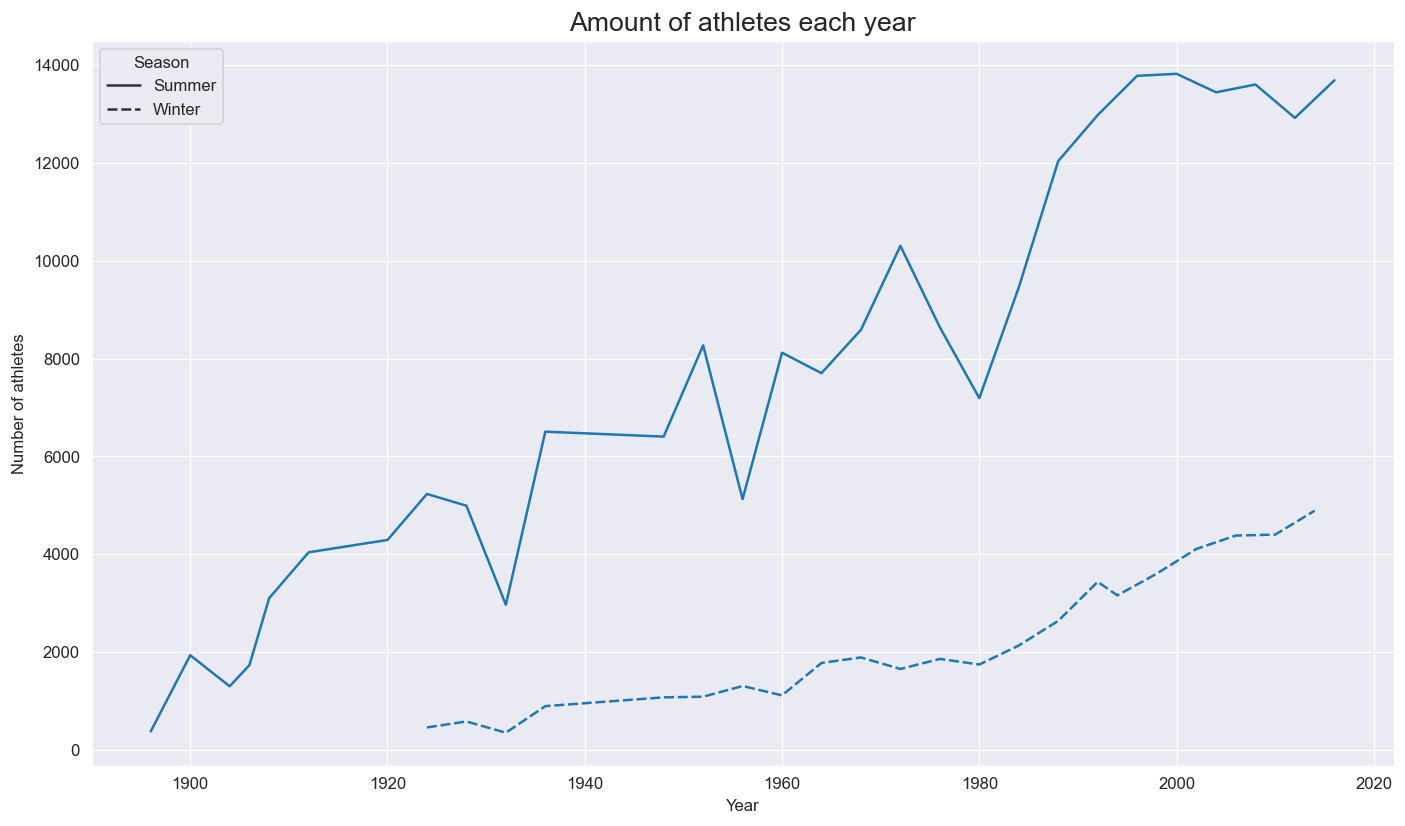

In [6]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Amount of athletes each year', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of athletes')
sns.lineplot(x=participants_1.Year, y=participants_1.Amount, style=participants_1.Season)
plt.show()

---
## Colclusion
---


We chose chart number 2 because it shows better all the data from the dataset. The first chart shows records only from the year 1924, but in the second we can see all records from all years.

---
## Exercise 2. Prepare a table showing the average number of women and men competing in the Summer Olympics for each National Olympic Committee.
---

In [7]:
gender_amount = df[df.Season == 'Summer'].groupby(['NOC','Sex','Year']).size().reset_index().rename(columns={0:"Amount"})
pd.set_option("display.precision", 3)
result_2 = gender_amount.drop('Year', axis=1).groupby(['NOC', 'Sex']).mean().reset_index()
result_2

,NOC,Sex,Amount
0,AFG,F,1.250
1,AFG,M,8.643
2,AHO,F,2.400
3,AHO,M,4.769
4,ALB,F,3.125
...,...,...,...
447,YUG,M,109.312
448,ZAM,F,2.111
449,ZAM,M,12.615
450,ZIM,F,9.417


---
## Visualization 1
---

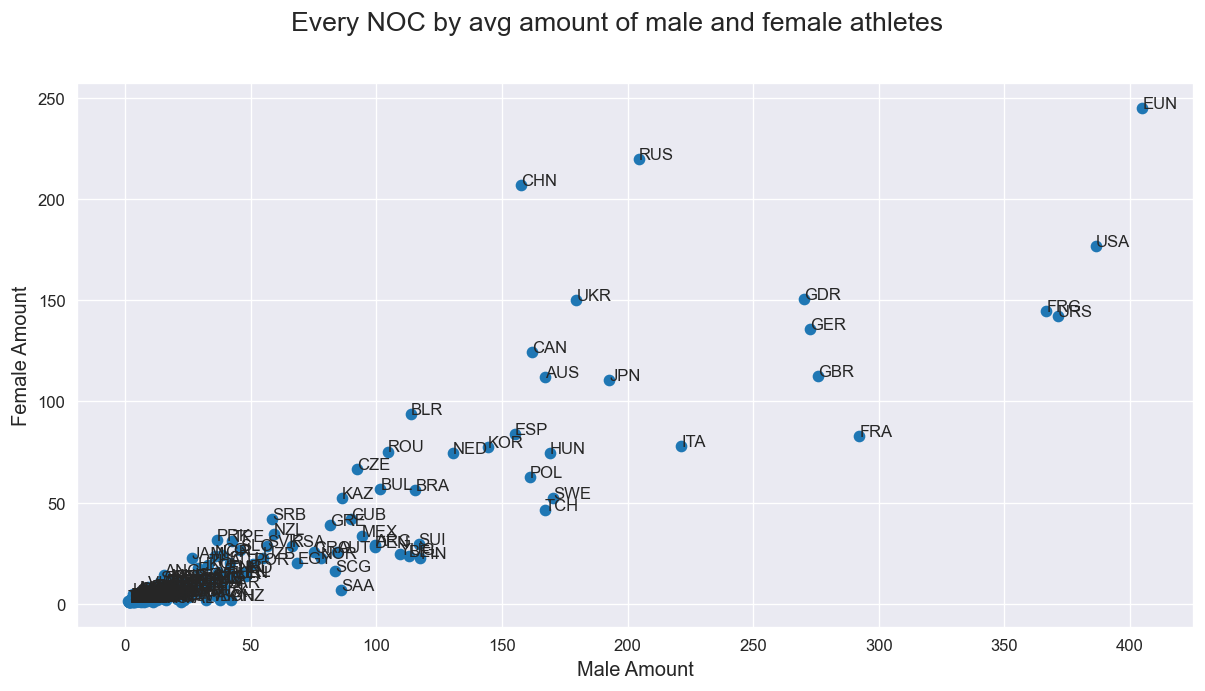

In [8]:
temp = result_2[['NOC', 'Sex']].groupby(["NOC"]).sum().reset_index()
temp = result_2[~result_2.NOC.isin(temp[temp['Sex'] == 'M'].NOC)]
male = temp[temp['Sex'] == 'M'].reset_index()
female = temp[temp['Sex'] == 'F'].reset_index()

fig, ax = plt.subplots()
fig.set_size_inches(12,6)
fig.set_dpi(120)
fig.suptitle('Every NOC by avg amount of male and female athletes', fontsize=16)
ax.set_xlabel('Male Amount', fontsize=12)
ax.set_ylabel('Female Amount', fontsize=12)
plt.scatter(male.Amount, female.Amount)

for i in range(len(male)):
    plt.annotate(male.loc[i, 'NOC'], (male.loc[i, 'Amount'], female.loc[i, 'Amount']))

---
## Visualization 2
---

## Data preparation

In [11]:
temp = result_2[~result_2.NOC.isin(temp[temp['Sex'] == 'M'].NOC)].reset_index()
summary = temp.groupby(['NOC']).sum()
new_sum = pd.DataFrame(np.repeat(summary.values, 2, axis=0), columns=summary.columns)

# print(new_sum)
temp['AVG'] = temp.Amount / new_sum.Amount * 100
female = temp[temp.Sex == 'F'].reset_index()
male = temp[temp.Sex == 'M'].reset_index()
delta = np.abs(female.AVG - male.AVG)
counter = 0
for i in range(len(delta)):
    for j in range(2):
        temp.loc[counter, 'Delta'] = delta.loc[i]
        counter += 1

worst = temp.sort_values(by=['Delta'], ascending=False).head(30)
best = temp.sort_values(by=['Delta']).head(30)



## Visualization

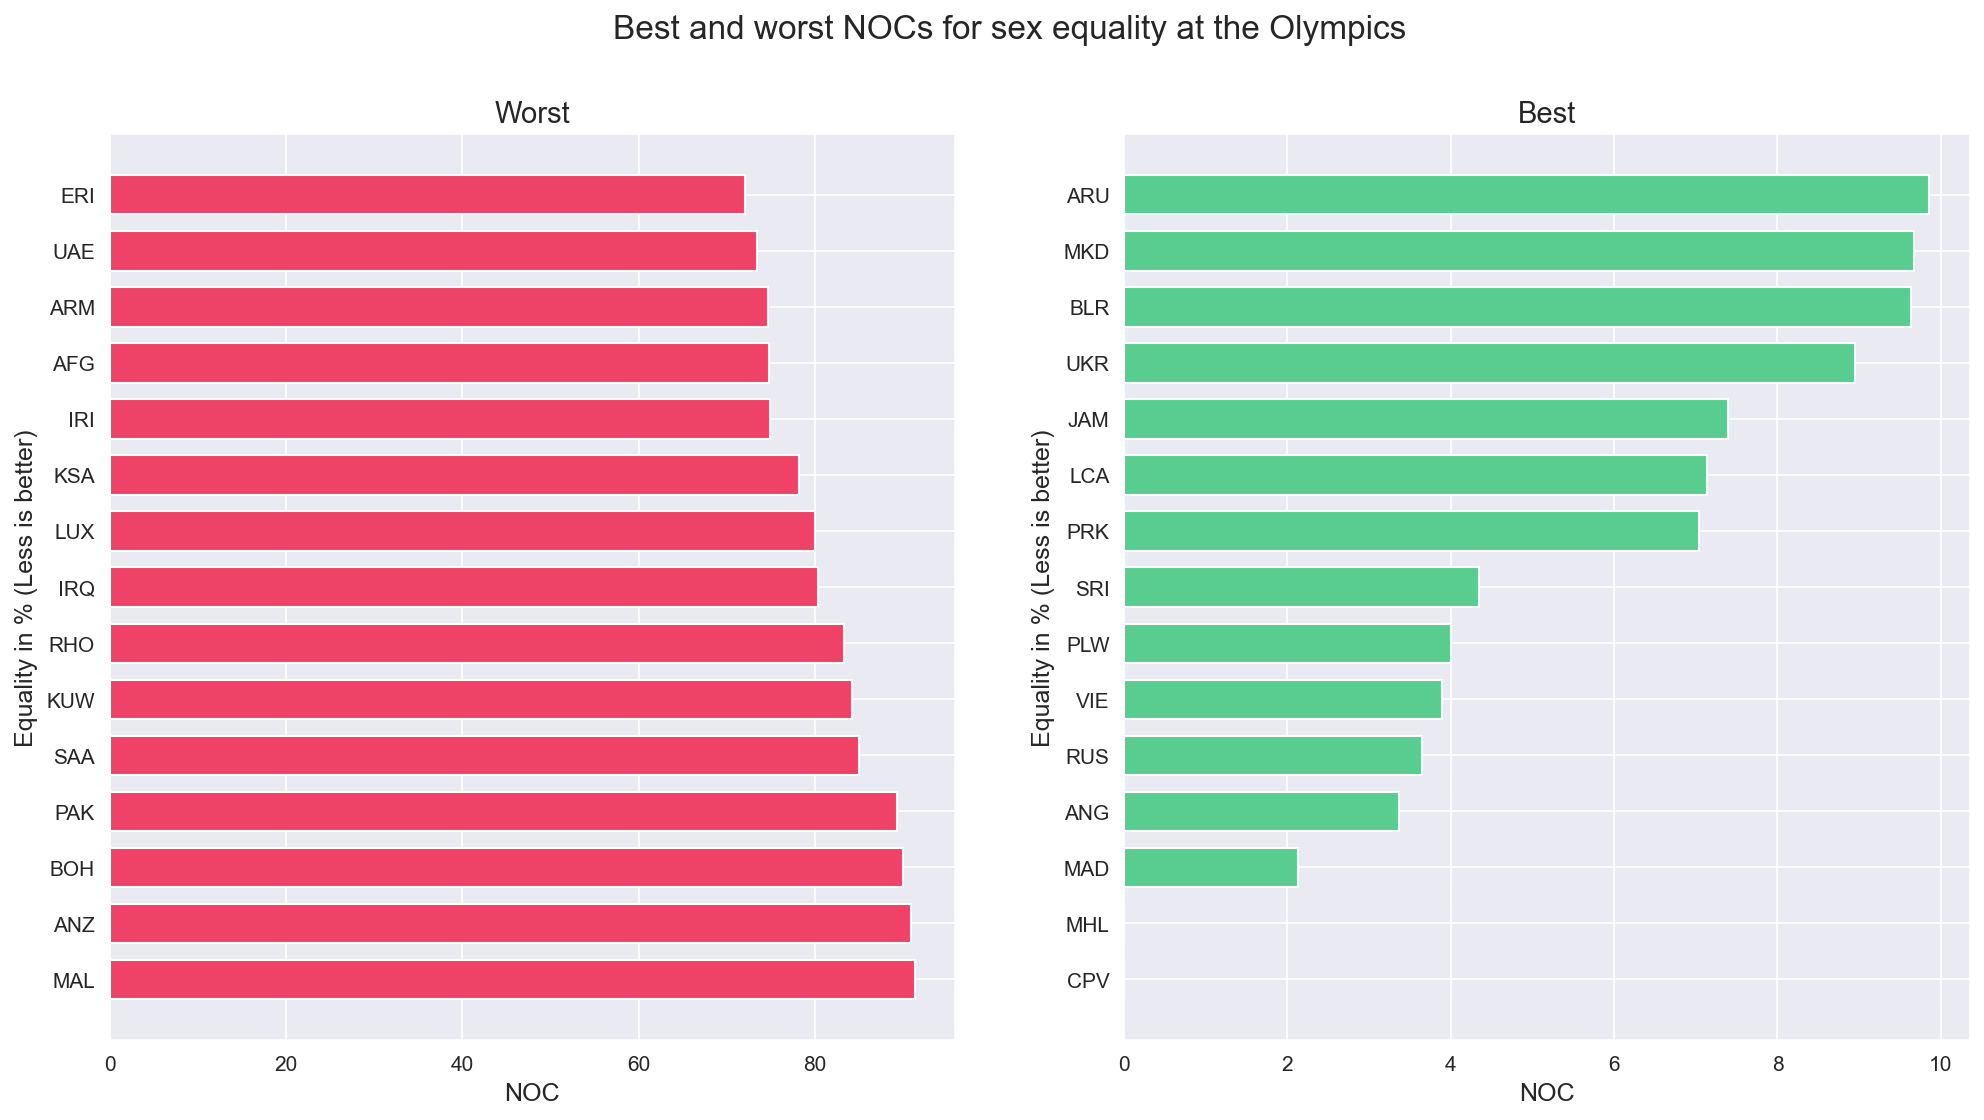

In [12]:
width = 0.7

fig, axs = plt.subplots(1,2)

axs[0].barh(worst.NOC, worst.Delta, width, label='Worst', align='center', color='#EE4266')

axs[1].barh(best.NOC, best.Delta, width, label='Best', align='center', color='#59CD90')

fig.set_size_inches(16,8)
fig.set_dpi(150)
axs[0].set_title('Worst', fontsize=14)
axs[0].set_xlabel('NOC', fontsize=12)
axs[0].set_ylabel('Equality in % (Less is better)', fontsize=12)

axs[1].set_title('Best', fontsize=14)
axs[1].set_xlabel('NOC', fontsize=12)
axs[1].set_ylabel('Equality in % (Less is better)', fontsize=12)
# fig.legend(['Worst', 'Best'])
fig.suptitle('Best and worst NOCs for sex equality at the Olympics', fontsize=16)
plt.show()


---
## Conclusion
---

Although the data in the second visualization is more interesting, we decided to choose a visualization that operates on data after the first task is completed - so we chose first visualization.

---
## 1.3 Prepare a list of the 5 National Olympic Committees that put together the largest number of different competitors and the number of their competitors depending on the number of Olympics in which the competitor participated.
---

In [13]:
unique = df.drop_duplicates(subset='Name').groupby('NOC').value_counts().groupby('NOC').sum().reset_index()
# Best committees with every athlete and athlete number of participation
best_committees = df[df.NOC.isin(unique.sort_values(by=[0], ascending=False).head(5).NOC)].groupby(['NOC','Name']).value_counts().groupby(['NOC','Name']).sum()
temp = best_committees.reset_index().rename(columns={0:'Number of participations'})
temp['Name'] = 1
result_3 = temp.groupby(['NOC', 'Number of participations']).sum().rename(columns={'Name':'Amount of athletes'})
result_3

Amount of athletes
NOC Number of participations                    
AUS 1                                        529
    2                                        145
    3                                         57
    4                                         25
    5                                          7
    6                                          3
    7                                          3
    8                                          3
    9                                          2
CAN 1                                        606
    2                                        120
    3                                         36
    4                                         16
    5                                          6
    6                                          2
GER 1                                        766
    2                                        176
    3                                         68
    4                                         36
    5                                         10
    6                                          2
    7                                          2
    8                                          4
    9                                          2
    10                                         2
URS 1                                       1042
    2                                        289
    3                                         84
    4                                         38
    5                                         11
    6                                          7
    7                                          1
    8                                          2
    9                                          4
    10                                         2
    13                                         1
    15                                         1
    18                                         1
USA 1                                       2089
    2                                        495
    3                                        163
    4                                         85
    5                                         27
    6                                         17
    7                                          5
    8                                          6
    9                                          3
    10                                         3
    11                                         2
    12                                         4
    28                                         1

---
## Visualization 1
---


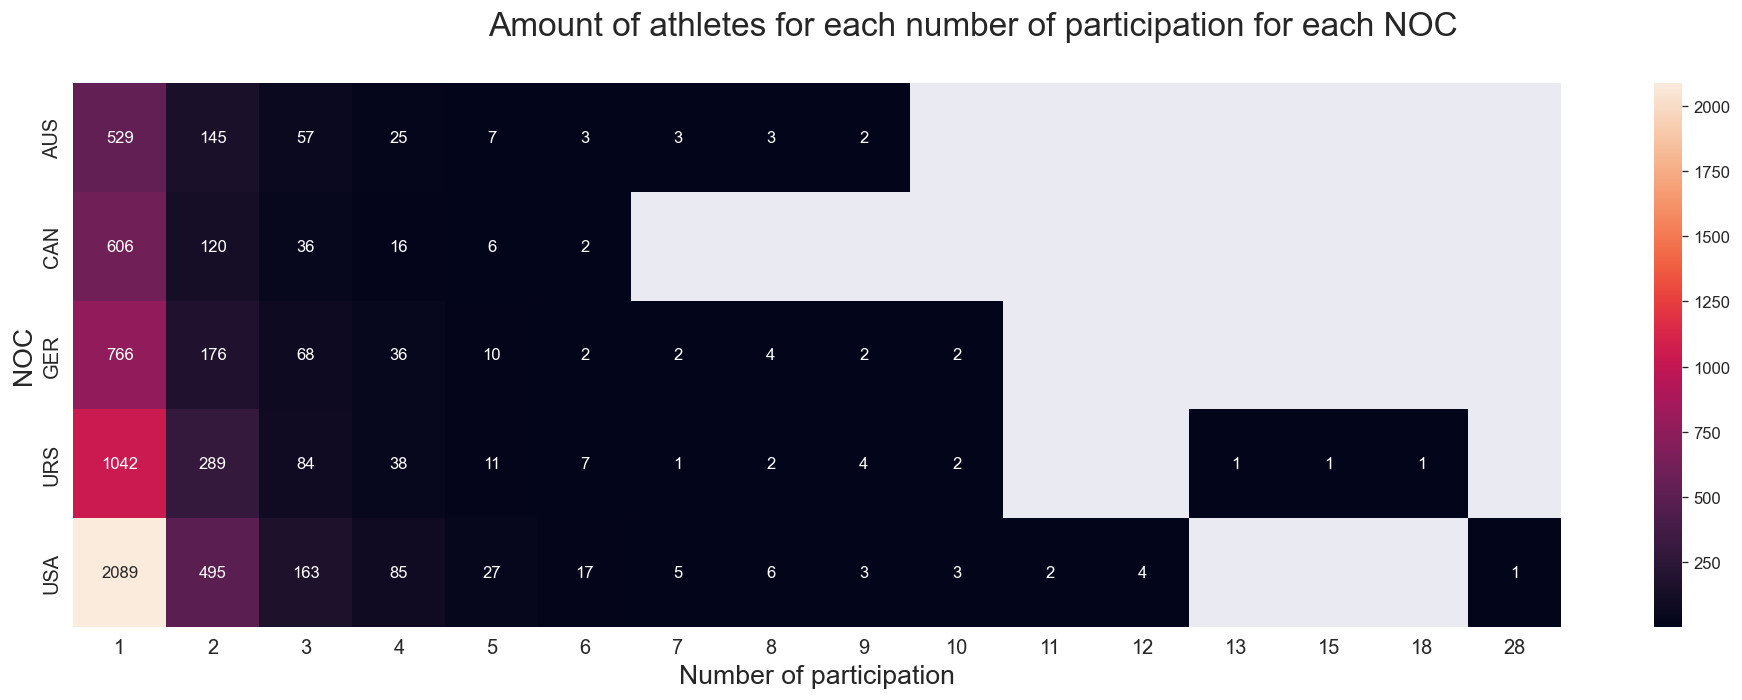

In [14]:
fig, ax = plt.subplots(figsize=(20,6), dpi=120)
fig.suptitle('Amount of athletes for each number of participation for each NOC', fontsize=20)
res = sns.heatmap(result_3.reset_index().pivot(index='NOC', columns='Number of participations', values='Amount of athletes'), annot=True, fmt='g')
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 12)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 12)
plt.xlabel('Number of participation', size=16)
plt.ylabel('NOC', size=16)
plt.show()

---
## Visualization 2
---

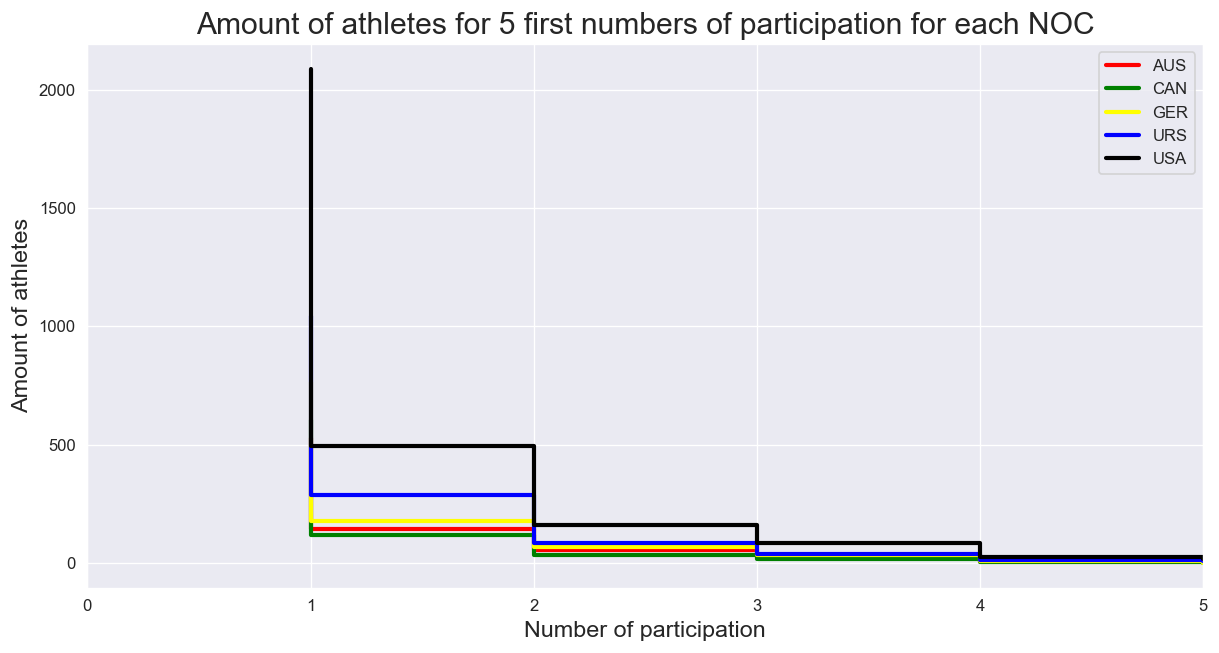

In [15]:

temp = result_3.reset_index()
NOC = temp.drop_duplicates(subset='NOC').NOC.reset_index()

fig, axi = plt.subplots()
fig.set_figwidth(12)
fig.set_figheight(6)
fig.set_dpi(120)

axi.set_xlabel('Number of participation', fontsize=14)
axi.set_ylabel('Amount of athletes', fontsize=14)

plt.title('Amount of athletes for 5 first numbers of participation for each NOC', fontsize=18)


colors = ['red', 'green', 'yellow', 'blue', 'black']


for i in range(5):
    axi.step(temp[temp['NOC'] == temp.loc[NOC.loc[i, 'index'], 'NOC']]['Number of participations'], temp[temp['NOC'] == temp.loc[NOC.loc[i, 'index'], 'NOC']]['Amount of athletes'], linewidth=2.5, color=colors[i], label=NOC.loc[i, 'NOC'])

axi.legend()

plt.xlim(xmin=0,xmax=5)

plt.show()


---
### Conclusion
---

In this exercise, we think that the heatmap was the best solution for visualization, so we choose first visualization.